In [0]:
#importing the mnist dataset
from keras.datasets import mnist

In [0]:
#load mnist data set
#x_train mean train image and y_train mean train label
#x_test mean test image and y_test mean test label
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [0]:
#Ddata processing
#before processing x_train and x_test the x_train and x_test is 3-dims
#Reshaping the array to 4-dims so that it can work with the Keras API
#In this case x_train.shape[0] is 60000 and x_test.shape[10000]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
#import plt for showing image
import matplotlib.pyplot as plt
%matplotlib inline

Sample Example from Test set
True Label:  8


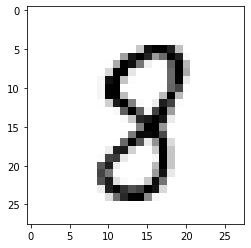

In [19]:
# Sample Example
print('Sample Example from Test set')
plt.imshow(x_test[563].reshape(28, 28),cmap='Greys')
print('True Label: ', y_test[563])

In [0]:
#Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Rescaling the result is between [0,1]
x_train /= 255
x_test /= 255

In [0]:
#importing the Keras packages that we need 
#this is for cnn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
#initializing the CNN
model = tf.keras.Sequential()

In [0]:
# Convolution
#input_shape 1 channel, 28x28
#32 - feature filters, 3x3
#relu to avoid negative values
model.add(layers.Convolution2D(32, (4,4), input_shape = (28, 28, 1), activation = 'relu'))

#Pooling
model.add(layers.MaxPooling2D(pool_size = (3,3)))

# Convolution
#16 - feature filters, 3x3
#input_shape is known by keras
model.add(layers.Convolution2D(32, (3, 3), activation ='sigmoid'))

#applying Max Pooling to the 2nd Convolutional layer
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

#Flattening (spatial information)
model.add(layers.Flatten())

#Full Connection
#units - number of nodes in the 1st hidden layer
model.add(layers.Dense(units = 256, activation = 'relu'))
#2nd hidden layer
model.add(layers.Dense(units = 128, activation = 'relu'))
#output layer
model.add(layers.Dense(units = 10, activation = 'sigmoid'))

In [61]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               73984     
_________________________________________________________________
dense_25 (Dense)             (None, 128)             

In [62]:
#Compiling the CNN
#sparse_categorical_crossentropy because we have categories (10)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


#Part2 - FITTING THE CNN TO THE IMAGES
model.fit(x = x_train, y = y_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3208 - accuracy: 0.8944
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0777 - accuracy: 0.9759
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0547 - accuracy: 0.9829
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0442 - accuracy: 0.9865
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0373 - accuracy: 0.9881
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0322 - accuracy: 0.9900
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0278 - accuracy: 0.9910
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0237 - accuracy: 0.9925
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0213 - accuracy: 0.9932
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.018

In [63]:
#Part3 - EVALUATING THE CLASSIFIER
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0385 - accuracy: 0.9913


[0.03854847699403763, 0.9912999868392944]

The predicted number is:  8


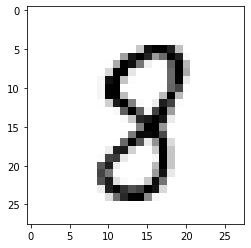

In [64]:
#Part4 - TESTING
import matplotlib.pyplot as plt
%matplotlib inline
#plotting the instance 563 of the test set
plt.imshow(x_test[563].reshape(28, 28),cmap='Greys')
#predicting the result
pred = model.predict(x_test[563].reshape(1, 28, 28, 1))
#argmax chooses the class with maximum probability 
print("The predicted number is: ", pred.argmax())